In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matminer.datasets import load_dataset
import pandas as pd
from monty.serialization import loadfn, dumpfn
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

from pymatgen.ext.matproj import MPRester
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

In [3]:
df = pd.read_excel('./HEA_sheet_for_YSP.xlsx', sheet_name='HEA')
df = df.rename(columns={"HEA Basic Information":"HEA Formula", "Unnamed: 1":"Number of Elements", "Unnamed: 2":"Is Equimolar", "Unnamed: 3":"Crystal Structure", "Synthesis Information":"Reported Precursors", "Unnamed: 5":"Synthesis Method", "Unnamed: 6":"Synthesis Description", "References":"Reported HEA Reference", "Unnamed: 8":"Year of Publication", "Propetry":"Formation Energy (eV/atom)"})
rows = []
for x in range (55):
    rows.append("row" + str(x))
df.index = rows
df = df.drop('row0')
df

,HEA Formula,Number of Elements,Is Equimolar,Crystal Structure,Reported Precursors,Synthesis Method,Synthesis Description,Reported HEA Reference,Year of Publication,Formation Energy (eV/atom)
row1,AlCuAu,3,NaN,NaN,"AlCuAu, AuAgPd, Crystal Silicon Blades, Linear...",Atomic layer deposition (ALD),"Two fcc films, AlCuAu alloy and AuAgPd solid-s...",https://doi.org/10.1016/j.matdes.2020.108802,2020,NaN
row2,CoCuAu,3,YES,NaN,"K3Fe(CN)6, CuCl2·2H2O, K4Fe(CN)6, KCl, NaH2PO4...",electrodeposition,The electrode was first polished with alumina ...,https://doi.org/10.3390/pharmaceutics15030876,2023,NaN
row3,CoCuPd,3,NO,NaN,"N2, Co2+, Potassium Citrate, NaBH4, Co Nanosph...",electrochemical deposition,NaN,https://doi.org/10.1021/acsami.7b17731,2018,NaN
row4,CoNiPd,3,"Equiatomic binary, ternary and quinary alloys ...",Cubic,"Ni, Co, Cr, Fe, Pd, water-cooled copper mold, ...",arc-melt (Ar gas),"Equiatomic binary, ternary and quinary alloys ...",https://doi.org/10.1007/s12540-023-01500-z,2023,NaN
row5,CoPdAu,3,YES (equimolar amounts of precursors),The crystal structure of NCs were characterize...,"P123, N2, H2O, KOH, CH3OH, H2SO4, NaBH4, K2Pd...",successive reduction method,The CoAuPd-1 NCs are synthesized through co-re...,https://doi.org/10.1016/j.jpowsour.2018.11.044,2019,NaN
row6,CoPtAu,3,YES (Prepared Co0.33Pt0.33Au0.33 but also prep...,The crystal structure of the CoPtAu nanopartic...,"Au(OOCCH3)3, Co(acac)2, Pt(acac)2, PEO-PPO-PEO...",sequential Reduction Method,"Gold acetate (Au(OOCCH3)3)⁠, cobalt (II) acety...",https://doi.org/10.1063/1.3072750,2009,NaN
row7,CrCuPt,3,NaN,NaN,"glycine, PVP, NaI, H2PtCl6, CuCl2, CrCl3, etha...",hydrothermal or solvothermal method,"Typically, 303.4 mg of glycine, 180.0 mg of po...",https://doi.org/10.1016/j.ces.2023.119486,2024,NaN
row8,CrPdAu,3,NO,NaN,"NaBH4, water",impregnation route followed by subsequent sodi...,CrAuPd/N-SiO2 can reproducibly be prepared thr...,https://doi.org/10.1039/C5CC02371H,2015,NaN
row9,CuAgPd,3,NaN,NaN,"CuBr, 250 mL three-necked flask, vacuum, PdCl2...",liquid chemical reduction,Cu NPs of three different morphologies were sy...,https://doi.org/10.1021/acsnano.2c01840,2022,NaN
row10,CuAgPt,3,NaN,The XRD analyses show that the crystal structu...,"AgNO3, Cu(NO3)2·3H2O, K2PtCl4, Na2PdCl4, branc...",aqueous-phase,"To produce AgPt nanoparticles, 20 mg of BPEI w...",https://doi.org/10.3390/ma13020254,2020,NaN


{'Al': 11, 'Cu': 24, 'Au': 11, 'Co': 28, 'Pd': 19, 'Ni': 25, 'Pt': 19, 'Cr': 14, 'Ag': 3, 'Ir': 10, 'Fe': 23, 'Rh': 7, 'Mn': 12, 'Ti': 3, 'Sn': 1, 'In': 1, 'Ga': 1, 'Pb': 1, 'Ru': 6, 'Nb': 2, 'Ta': 1, 'Zr': 2, 'Mo': 1, 'Ce': 1, 'W': 2, 'V': 1, 'Si': 1}


/var/folders/7c/90tth4h53mnglfwy8ww1kng00000gp/T/ipykernel_93093/945614756.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elements, y=counts, palette="mako")


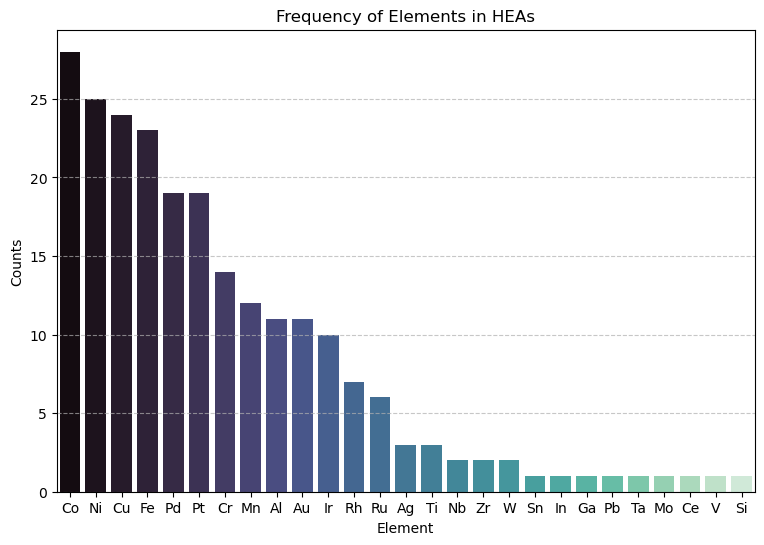

In [33]:
from pymatgen.core.composition import Composition

formulas = df["HEA Formula"]
element_counts = {}
for formula in formulas:
    composition = Composition(formula)
    elements = composition.elements
    for element in elements:
        element = str(element)
        if not element in element_counts:
            element_counts[element] = 1
        else:
            element_counts[element] +=1
    
print(element_counts)


sorted_items = sorted(element_counts.items(), key=lambda item: item[1], reverse=True)
elements = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

# Create the bar graph directly using seaborn.barplot
plt.figure(figsize=(9, 6)) # Adjust figure size as needed
sns.barplot(x=elements, y=counts, palette="mako")

plt.title('Frequency of Elements in HEAs')
plt.xlabel('Element')
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: add grid lines
plt.show()


{3: 27, 5: 19, 10: 2, 6: 5, 4: 1}


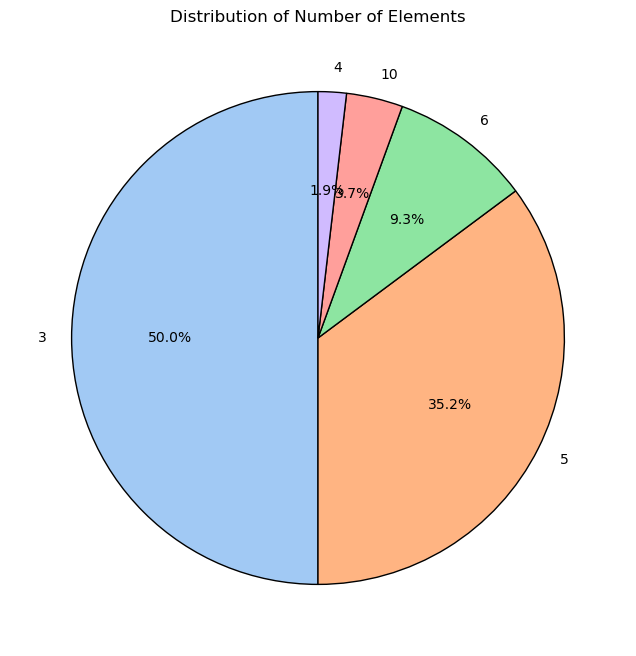

In [48]:
number_of_elements = df["Number of Elements"]
number_of_elements_counts = {}
for element_count in number_of_elements:
    if not element_count in number_of_elements_counts:
        number_of_elements_counts[element_count] = 1
    else:
        number_of_elements_counts[element_count] +=1
print(number_of_elements_counts)

sorted_items = sorted(number_of_elements_counts.items(), key=lambda item: item[1], reverse=True)

# Now, extract the keys (amt_of_elements) and values (frequencies) from this sorted list of tuples
amt_of_elements = [item[0] for item in sorted_items]
frequencies = [item[1] for item in sorted_items]

colors = sns.color_palette('pastel')[0:len(frequencies)]

plt.figure(figsize=(8, 8)) # Optional: set figure size
plt.pie(frequencies, labels=amt_of_elements, colors=colors, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}) # Customize wedges
plt.title('Distribution of Number of Elements')
plt.show()

